# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [3]:
#  1. Get the total rides for each city type
# In Step 1, use the groupby() function to create a Series of data that has the type of city as the index,
# then apply the count() method to the "ride_id" column.
ride_count = pyber_data_df.groupby(["type"]).count()["ride_id"]

In [4]:
# 2. Get the total drivers for each city type
# In Step 2, use the groupby() function to create a Series of data that has the type of city as the index,
# then apply the sum() method to the "driver_count" column.
driver_count = city_data_df.groupby(["type"]).sum()["driver_count"]
# when using pyber_data_df for this it counts each city multiple times based on the amount of rides due to the merging
# use city_data_df to ensure each city is counted only once

In [5]:
#  3. Get the total amount of fares for each city type
# In Step 3, use the groupby() function to create a Series of data that has the type of city as the index,
# then apply the sum() method to the "fare" column.
total_fare = pyber_data_df.groupby(["type"]).sum()["fare"]

In [6]:
#  4. Get the average fare per ride for each city type.
# In Step 4, calculate the average fare per ride by city type by
# dividing the sum of all the fares by the total rides.
average_fare_per_ride = total_fare / ride_count

In [7]:
# 5. Get the average fare per driver for each city type. 
# In Step 5, calculate the average fare per driver by city type by
# dividing the sum of all the fares by the total drivers.
average_fare_per_driver = total_fare / driver_count

In [8]:
#  6. Create a PyBer summary DataFrame. 
# In Step 6, create a PyBer summary DataFrame with all the data gathered from Steps 1-5,
# using the column names (shown in the module)
pyber_summary_df = pd.DataFrame()
pyber_summary_df["Total Rides"] = ride_count
pyber_summary_df["Total Drivers"] = driver_count
pyber_summary_df["Total Fares"] = total_fare
pyber_summary_df["Average Fare per Ride"] = average_fare_per_ride
pyber_summary_df["Average Fare per Driver"] = average_fare_per_driver

In [9]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [10]:
#  8. Format the columns.
# total rides + total drivers need to have the comma separating thousands and hundreds
# total fares + avg fare per ride + avg fare per driver should be in currency format w 2 decimal places
pyber_summary_df.style.format({"Total Rides": "{:0,.0f}",
                               "Total Drivers": "{:0,.0f}",
                               "Total Fares": "${:0,.2f}",
                               "Average Fare per Ride":"${:0,.2f}",
                               "Average Fare per Driver":"${:0,.2f}"})

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [11]:
# 1. Read the merged DataFrame
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [12]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
# In Step 1, create a new DataFrame with multiple indices using the groupby() function
# on the "type" and "date" columns of the pyber_data_df DataFrame,
# then apply the sum() method on the "fare" column to show the total fare amount for each date.
sum_of_fares_df = pyber_data_df.groupby(["type", "date"]).sum()[["fare"]]
## double brackets makes it a df, single brackets is series

In [13]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
# In Step 2, use the provided code snippet to reset the index.
# This is needed to use the pivot() function in the next step (Step 3).
sum_of_fares_df = sum_of_fares_df.reset_index()

In [14]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
# In Step 3, use the pivot() function to convert the DataFrame from the previous step so that
# the index is the "date," each column is a city "type," and the values are the "fare."
# After this step, you’ll see that each cell has the total fare for the date and time (demonstrated in module)
# Note: In cells where there is no fare to be summed for that row, the cell will be filled with NaNs.
sum_of_fares_pivot = sum_of_fares_df.pivot(index = "date", columns = "type", values = "fare")

In [15]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
# In Step 4, create a new DataFrame by using the loc method on the following date range: 2019-01-01 through 2019-04-28.
sum_of_fares_selectdate_df = sum_of_fares_pivot.loc['2019-01-01':'2019-04-28']
# after comparing w the module's graph - loc ending date is 4/28, not 4/29

In [16]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
# In Step 5, use the provided code snippet to reset the index of the DataFrame from the previous step (Step 4)
# to a datetime data type. This is necessary to use the resample() method in Step 7.
sum_of_fares_selectdate_df.index = pd.to_datetime(sum_of_fares_selectdate_df.index)

In [17]:
# 7. Check that the datatype for the index is datetime using df.info()
# In Step 6, use the provided code snippet, df.info(), to check that the "date" is a datetime data type.
sum_of_fares_selectdate_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2177 entries, 2019-01-01 00:08:16 to 2019-04-27 23:52:44
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  567 non-null    float64
 2   Urban     1496 non-null   float64
dtypes: float64(3)
memory usage: 68.0 KB


In [18]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
# In Step 7, create a new DataFrame by applying the resample() function to the DataFrame you modified in Step 5.
# Resample the data in weekly bins, then apply the sum() method to get the total fares for each week.
sum_of_fares_selectweeks_df = sum_of_fares_selectdate_df.resample("W").sum()
sum_of_fares_selectweeks_df

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


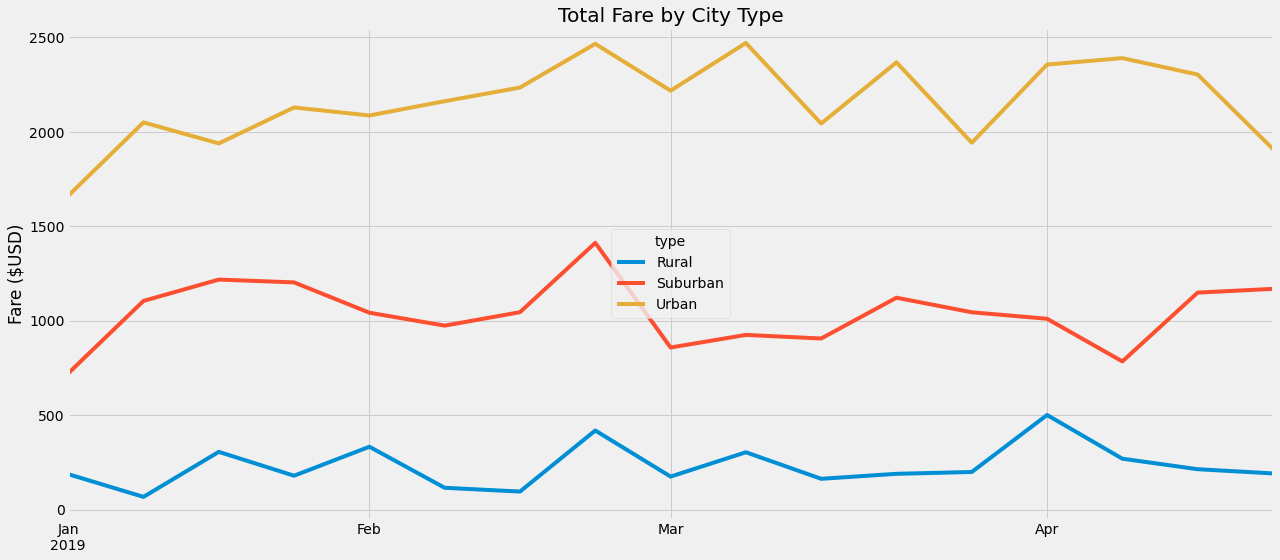

In [20]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
#use df.plot() function to make graph
fare_by_city_type = sum_of_fares_selectweeks_df.plot(figsize =(18,8))
#y limit is 2500 in module
fare_by_city_type.set_ylim(-50, 2550, 500)
fare_by_city_type.set_ylim(-50, 2550, 500)
#title + y axis + x axis
fare_by_city_type.set_ylabel("Fare ($USD)")
fare_by_city_type.set_title("Total Fare by City Type")
fare_by_city_type.set_xlabel("")
# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
plt.tight_layout()
plt.savefig("analysis/PyBer_fare_summary.png")